In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
data=pd.read_csv("owid-covid-data.csv")
data.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


In [3]:
data.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
count,1.632930e+05,1.631330e+05,1.611500e+05,1.454510e+05,145487.000000,143390.000000,162535.000000,162375.000000,160398.000000,144706.000000,...,106050.000000,104595.000000,68569.000000,123664.000000,155268.000000,136253.000000,5.696000e+03,5696.000000,5696.000000,5696.000000
mean,2.536044e+06,1.157084e+04,1.156560e+04,5.766407e+04,171.137304,172.673031,29447.756785,166.431538,165.507110,509.384956,...,10.627229,32.778221,50.788710,3.027816,73.576309,0.725587,3.761302e+04,9.404336,15.967077,972.197816
std,1.543441e+07,8.442598e+04,8.257830e+04,3.021145e+05,832.251328,817.024076,51852.379656,683.021740,532.174029,784.551311,...,10.558306,13.523688,31.811788,2.450110,7.491615,0.149964,1.043065e+05,16.439173,30.092830,1420.342295
min,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000,0.000000,0.001000,0.000000,0.000000,0.000000,...,0.100000,7.700000,1.188000,0.100000,53.280000,0.394000,-3.772610e+04,-28.450000,-95.920000,-1826.595723
25%,2.001000e+03,1.000000e+00,7.000000e+00,7.900000e+01,0.000000,0.143000,623.579000,0.042000,1.630000,18.580250,...,1.900000,21.600000,19.351000,1.300000,69.500000,0.602000,-7.515000e+01,-0.722500,-0.752500,-29.788442
50%,2.611700e+04,7.900000e+01,1.071430e+02,7.830000e+02,2.000000,2.429000,4731.521000,11.439000,18.829000,127.737500,...,6.300000,31.400000,49.839000,2.400000,75.050000,0.743000,3.424600e+03,6.065000,7.195000,473.393182
75%,2.987020e+05,1.063000e+03,1.146000e+03,7.307000e+03,20.000000,21.286000,37724.466000,101.289500,120.859750,711.954750,...,19.300000,41.300000,83.241000,4.000000,78.930000,0.845000,2.478462e+04,14.520000,22.997500,1656.361067
max,4.451295e+08,4.206334e+06,3.444237e+06,5.995245e+06,18020.000000,14689.143000,706541.904000,51427.491000,16052.608000,6322.263000,...,44.000000,78.100000,100.000000,13.800000,86.750000,0.957000,1.080748e+06,111.010000,374.930000,9153.060433


<AxesSubplot:>

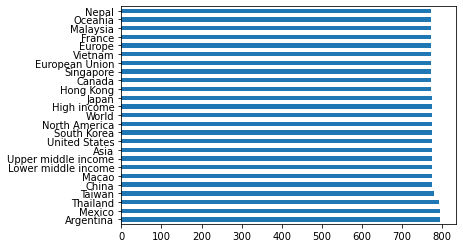

In [9]:
# Amount of Times Each Country Appears in DataSet,  
# Top 25
data['location'].value_counts()[:25].plot(kind='barh')

In [34]:
# Generalized Function for Making Plots for Each Country, Use for more
def plot_country(data, country, metric):
    #Selecting the 7 key columns for country in dataset
    new_df=data[data['location']==country].copy()
    new_df=new_df[['date','total_cases','new_cases',
         'total_deaths','new_deaths',
         'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred',
         'new_deaths_per_million', 'new_cases_per_million']].copy()
    new_df.date = pd.to_datetime(new_df['date'])
    new_df.set_index('date', inplace=True)
    
    new_df[[metric]].plot(figsize = (15,5))
    plt.title('Timeline of ' + metric + ' in ' + country)
    

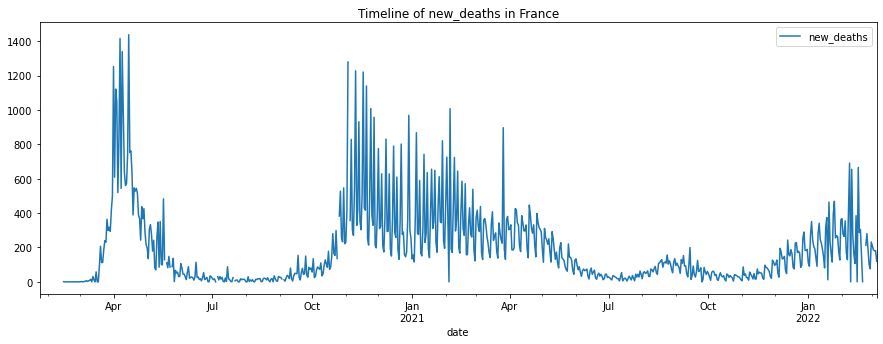

In [36]:
plot_country(data, 'France', 'new_deaths')